## １．はじめに
　このワークショップは、[Pythonプログラミング言語](https://python.org/)を使用して天文学データを分析することを目的としています。 **Pythonの経験は必要ありません。**
 
　Pythonは強力なツールですが、数値およびデータ分析環境として次のパッケージが独自に組み込まれています。
* **[Matplotlib](https://matplotlib.org)**：対話式または出版物品質のプロット
* **[Numpy](http://www.numpy.org)**：ベクトルの計算や線形代数
* **[Scipy](https://www.scipy.org)**：根号の検出、補間、統合、信号処理、統計、線形代数などの厳選されたアルゴリズムの集まり
* **[Jupyter Notebook](https://jupyter.org)**：(以前のIPython Notebook)あなたが現在使用しているMathematicaのようなインターフェイス
* **[Astropy](https://www.astropy.org/)**：天文学のためのコミュニティライブラリ

　Python自体の基本をおさえてから、様々なアプリケーションにおいてこれらのパッケージを使用していきます。
 
　**メモ**：Pythonと対話する最も簡単な方法は、次のようなコマンドラインインタープリターを使用することです。
![A session in the Python command line interpreter](https://raw.github.com/lpsinger/astropy-tutorial/master/terminal.png)

　Pythonを使用するための比較的新しく非常に強力な方法は、Jupyter Notebookインターフェースを使用することです。これにより、Mathematicaのようにコンピューターのコードと生成されたプロットを混在させることができます。

Text(0, 0.5, 'cheeriness')

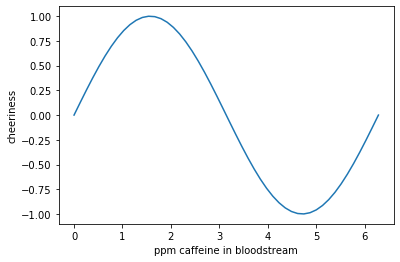

In [16]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(0, 2 * np.pi)
plt.plot(x, np.sin(x))
plt.xlabel('ppm caffeine in bloodstream')
plt.ylabel('cheeriness')

そして表も

In [11]:
import astropy.table
tbl = astropy.table.Table()
tbl.add_column(astropy.table.Column(data=np.arange(5),
    name='integers'))
tbl.add_column(astropy.table.Column(data=np.arange(5)**2,
    name='their squares'))
tbl

<Table length=5>
integers their squares
 int64       int64    
-------- -------------
       0             0
       1             1
       2             4
       3             9
       4            16

ノートや数式の埋め込みも

> *神は言った*
>
> > $$\nabla \cdot \mathbf{D} = \rho$$
> > $$\nabla \cdot \mathbf{B} = 0$$
> > $$\nabla \times \mathbf{E} = -\frac{\partial\mathbf{B}}{\partial t}$$
> > $$\nabla \times \mathbf{H} = J + \frac{\partial\mathbf{D}}{\partial t}$$
>
> *そして光があった。*

　対話的なデータ分析を行うのに非常に便利なので、このチュートリアルではIPython Notebookインターフェイスを使用していきます。**警告**：これを使うとあなたのためにはなりません。


## ２．Python/Matplotlib/Numpy/Scipy/Astropyの入手方法（必要な人は）
　Pythonやこのチュートリアルで説明するすべてのパッケージはオープンソースのソフトウェアであるため、それらをインストールする方法は複数あります。**しかし、これらのモジュールをダウンロード・インストールするためにGROWTHウェブサイトの指示に従っていた場合、これらのパッケージはすでにインストールされています。**

### Linux/UNIXユーザー

　一般的なLinux / UNIXディストリビューション（例えば、[Ubuntu](https://www.ubuntu.com),[Debian](https://debian.org),[Fedora](https://fedoraproject.org)）がある場合、おそらくすでにPythonがインストールされており、パッケージマネージャーからMatplotlibなどを入手できます。
 
 DebianかUbuntuを使用している場合、
 
 　　　$ sudo apt-get install jupyter-notebook python3-matplotlib python3-astropy python3-scipy

### Macユーザー

　Mac OSの全バージョンにはPythonのインタープリターが組み込まれていますが、[MacPorts](https://macports.org), [HomeBrew](https://brew.sh), [Fink](http://www.finkproject.org)などのパッケージマネージャーを使用することで、MatplotlibやNumpyを心持ち取得しやすくなります。私はMacPortsを使用しているので、それをおすすめします。MacPortsをインストールし、次のように実行してください。
 
    $ sudo port install py37-matplotlib py37-scipy py37-jupyterlab py37-astropy

### Windowsユーザー

　WindowsにはPythonが付属していませんが、人気の無料ディストリビューションには[Anaconda](https://www.anaconda.com/distribution/)や[Canopy](https://www.enthought.com/product/canopy/)があります。代替方法として、[VirtualBox](https://www.virtualbox.org)を使用して仮想マシンをセットアップし、その上にLinuxディストリビューションをインストールする方法があります。

## ３．Pythonの基本

### `print()`関数と文字列リテラル

このコードの理解は非常に簡単です。画面上に何か表示したいとき、次のようにします。

In [15]:
print('Hello world!')

Hello world!


　これは組み込みコマンド`print`とシングルクォーテーション「'」で囲まれた文字列で構成されたPythonステートメントです。文字列内はダブルクォーテーション「"」で区切ることが出来ます。

In [16]:
print('She said, "Hello, world!"')

She said, "Hello, world!"


　文字列の中でシングルクォーテーションを使いたい場合は、ダブルクォーテーションで文字列を囲むと良いでしょう。

In [17]:
print("She said, 'Hello, world!'")

She said, 'Hello, world!'


　シングルクォーテーションとダブルクォーテーションの両方が必要な場合は、バックスラッシュ「\」を使い文字をエスケープ出来ます。

In [18]:
print('She said, "O brave new world, that has such people in\'t!"')

She said, "O brave new world, that has such people in't!"


　改行を含む文字列が必要な場合、トリプルクォーテーション「'''」もしくはトリプルダブルクォーテーション「"""」を使用します。

In [19]:
print("""MIRANDA
  O, wonder!
  How many goodly creatures are there here!
  How beauteous mankind is! O brave new world
  That has such people in't!""")

MIRANDA
  O, wonder!
  How many goodly creatures are there here!
  How beauteous mankind is! O brave new world
  That has such people in't!


　同じ行に別々に表示したいものがある場合、次のようにコンマ「,」で区切りましょう。

In [20]:
person = 'Miranda'
print("'Tis new to", person)

'Tis new to Miranda


　これがPythonでの文字列の割り当てです。文字列は追加することで連結することが出来ます。

In [21]:
'abc' + 'def'

'abcdef'

　または乗算して繰り返すことが出来ます。

In [23]:
'abcdef' * 2

'abcdefabcdef'

### 数値とbooleanリテラル

Pythonの数値型には、整数と、実数、複素数の両方の浮動小数点数が含まれます。

In [2]:
a = 30 # 整数
b = 0xDEADBEEF # 16進数の整数
c = 3.14159 # 浮動小数点数
d = 5.1e10 # 指数表記
e = 2.5 + 5.3j # 複素数
hungry = True # booleanリテラル
need_coffee = False # もう１つのbooleanリテラル

　ちなみに末尾のハッシュタグ「#」に続いているテキストはコメントであり、Pythonには無視されます。
 
　Pythonの算術演算子はC、C++、Javaなどに似ていて、加算及び減算があります。

In [26]:
a + c

33.14159

乗算や

In [27]:
a * e

(75+159j)

除算もあります。

In [28]:
a / c

9.549304651466295

**重要事項**：C、C ++、Javaなどとは異なり、整数の除算は浮動小数点数として表します。

In [29]:
7 / 3

2.3333333333333335

　除算の結果を整数で得たいときは、ダブルスラッシュ「//」を演算子として用います。

In [30]:
a = 7
b = 3
7 // 3

2

　「％」は剰余演算子になります。

In [31]:
32 % 26

6

　べき乗は演算子「`**`」を使い実行できます。

In [32]:
print(5 ** 3, 9**-0.5)

125 0.3333333333333333


### タプル

　タプルはPythonのデータ型の一種で、いくつかの要素を持っています。タプルは不変なので、一度作成するとタプルから値を追加したり、削除したり、変更したりといった操作は出来ません。タプルは関連する値の短いデータを格納したり、関数から複数の値を返したりするのに非常に便利です。タプルは次のように作成します。

In [33]:
some_tuple = ('a', 'b', 'c')
another_tuple = ('caffeine', 6.674e-11, 3.14, 2.718)
nested_tuple = (5, 4, 3, 2, ('a', 'b'), 'c')

タプルを作成すると、そこから値を取得することが出来ます。大括弧［］で**０から始まる**インデックスを指定します。

In [34]:
some_tuple[0]

'a'

In [35]:
some_tuple[1]

'b'

　**スライス表記**を使って値の範囲を指定できます。

In [36]:
nested_tuple[1:4]

(4, 3, 2)

　また、タプルの末尾から逆方向にカウントするには、負のインデックスを指定します。

In [37]:
another_tuple[-1]

2.718

In [38]:
another_tuple[-2]

3.14

　文字列は１つ１つの文字が要素となっているタプルとして扱うことが出来ます。

In [39]:
person = 'Miranda'
print(person[3:6])

and


### リスト

　タプルのようなデータの格納場所が欲しいが、要素の追加や削除、既存の要素の変更をしたい場合はリストを使うと良いでしょう。構文はほとんど同じですが、小括弧（）の代わりに大括弧［］を使ってリストを作成します。

In [40]:
your_list = ['foo', 'bar', 'bat', 'baz']
my_list = ['xyzzy', 1, 3, 5, 7]

　リストでは要素の変更を行うことができます。

In [41]:
my_list[1] = 2
print(my_list)

['xyzzy', 2, 3, 5, 7]


　要素を既存のリストに追加することも出来ます。

In [42]:
my_list.append(11)
print(my_list)

['xyzzy', 2, 3, 5, 7, 11]


　要素をリストから削除することも出来ます。

In [43]:
del my_list[0]
print(my_list)

[2, 3, 5, 7, 11]


### セット

　それぞれの一意性は保証されているが、必ずしも順序が重要ではない要素をまとめておきたいときは、セットを使います。タプルやリストと同じような構成ですが、中括弧｛｝を使って作成します。

In [45]:
a = {5, 6, 'foo', 7, 7, 8}
print(a)

{5, 6, 7, 8, 'foo'}


　セットには要素を追加することが出来ます。

In [46]:
a.add(3)
print(a)

{3, 5, 6, 7, 8, 'foo'}


　また要素を削除することも出来ます。

In [47]:
a.remove(3)
print(a)

{5, 6, 7, 8, 'foo'}


　「&」演算子を使って集合の共通部分を割り出します。

In [48]:
{1, 2, 3, 4, 5, 6} & {3, 4}

{3, 4}

　「|」演算子は和集合を表します。

In [49]:
{1, 2, 3, 4, 5, 6} | {6, 7}

{1, 2, 3, 4, 5, 6, 7}

　「-」演算子は差集合を表します。

In [50]:
{1, 2, 3, 4, 5, 6} - {3, 4}

{1, 2, 5, 6}

### 辞書

　文字列やその他のPython値を索引に、リストのようにデータを集めたいときは辞書機能を使うといいでしょう。辞書は、あらゆるタイプのデータベースのような操作をしたり、ある値のセットから別の値のセットへの関連付けを保存したりするのに便利です。辞書を作るときは、キーと値のペアのリストを中括弧｛｝で囲みます。

In [1]:
my_grb = {'name': 'GRB 130702A', 'redshift': 0.145, 'ra': (14, 29, 14.78), 'dec': (15, 46, 26.4)}
my_grb

{'name': 'GRB 130702A',
 'redshift': 0.145,
 'ra': (14, 29, 14.78),
 'dec': (15, 46, 26.4)}

　辞書の項目を使って、タプルやリストと同様に大括弧［］でインデックスを指定することが出来ます。

In [2]:
my_grb['dec']

(15, 46, 26.4)

　また、要素を追加することが出来ます。

In [3]:
my_grb['url'] = 'http://gcn.gsfc.nasa.gov/other/130702A.gcn3'
my_grb

{'name': 'GRB 130702A',
 'redshift': 0.145,
 'ra': (14, 29, 14.78),
 'dec': (15, 46, 26.4),
 'url': 'http://gcn.gsfc.nasa.gov/other/130702A.gcn3'}

　要素を削除することも出来ます。

In [4]:
del my_grb['url']
my_grb

{'name': 'GRB 130702A',
 'redshift': 0.145,
 'ra': (14, 29, 14.78),
 'dec': (15, 46, 26.4)}

　辞書のキーは、タプル、文字列、整数、浮動小数点などの**不変の**Python値にすることが出来ます。辞書の値は、リストや他の辞書を含む、**あらゆる**Python値にすることができます。

In [5]:
{
    'foods': ['chicken', 'veggie burger', 'banana'],
    'cheeses': {'muenster', 'gouda', 'camembert', 'mozarella'},
    (5.5, 2): 42,
    'plugh': 'bat'
}

{'foods': ['chicken', 'veggie burger', 'banana'],
 'cheeses': {'camembert', 'gouda', 'mozarella', 'muenster'},
 (5.5, 2): 42,
 'plugh': 'bat'}

### `None` オブジェクト

　例えば、データセットに欠損があるときなど、値がないことを表さなければならない場合もあります。`-1`や`99`などの値を使いたくなるかもしれませんが、そうはせずに組み込みオブジェクト`None`を使用しましょう。

In [6]:
a = None

### 条件文

　Pythonでは、条件やループなどの制御フロー文には、インデントで示されるブロックがあります。 ブロック内で一貫している限り、スペースやタブはいくつでもかまいません。一般的には、4つのスペース、2つのスペース、タブのどれかでインデントします。
 
　`if` ... `elif` ... `else` 文を使用して、ブール式の真偽に応じて異なるコードを実行できます。

In [7]:
a = 5

if a < 3:
    print("i'm in the 'if' block")
    messsage = 'a is less than 3'
elif a == 3:
    print("i'm in the 'elif' block")
    messsage = 'a is 3'
else:
    print("i'm in the 'else' block")
    message = 'a is greater than 3'

print(message)

i'm in the 'else' block
a is greater than 3


　数学表記と同じように、不等式をつなぐことができます

In [9]:
if 0 < a <= 5:
    print('a is greater than 0 but less than or equal to 5')

a is greater than 0 but less than or equal to 5


　また、比較演算子をブール演算子`and`、`or`、および`not`と組み合わせることができます。

In [10]:
if a < 6 or a > 8:
    print('yahoo!')

yahoo!


In [11]:
if a < 6 and a % 2 == 1:
    print('a is an odd number less than 6!')

a is an odd number less than 6!


In [15]:
if not a == 5: #　a != 5 とするのと同じ
    print('a is not 5')

　比較演算子`is`は、2つのPython値が等しいかだけでなく、同じオブジェクトであるかどうかも確かめます。`None`オブジェクトは1つしかないため、`is`演算子は`None`の検出に特に役に立ちます。

In [16]:
food = None

if food is None:
    print('No, thanks')
else:
    print('Here is your', food)

No, thanks


　同様に`is not`演算子があります。

In [17]:
if food is not None:
    print('Yum!')

　`in`および`not in`演算子は、文字列やセット、辞書の要素であるかを確かめるのに便利です。

In [18]:
if 3 in {1, 2, 3, 4, 5}:
    print('indeed it is')

indeed it is


In [19]:
if 'i' not in 'team':
    print('there is no "i" in "team"')

there is no "i" in "team"


　辞書を参照する場合、`in`演算子は、項目が辞書のキーの中にあるかどうかを確かめます。

In [20]:
d = {'foo': 3, 'bar': 5, 'bat': 9}
if 'foo' in d:
    print('the key "foo" is in the dictionary')

the key "foo" is in the dictionary


### `for`ループ・`while`ループ

　Pythonには`for`と`while`による二種類のループ(繰り返し)処理があります。`for`ループは、コレクション（タプルやセット、リスト、ディクショナリ、文字列）内の各要素に対して一連の命令文を繰り返す場合に役立ちます。`while`ループはあまり一般的ではありませんが、ブール型の命令文がfalseになるまで繰り返すときに使われます。

In [21]:
for i in [0, 1, 2, 3]:
    print(i**2)

0
1
4
9


　組み込み関数`range`は、その数値のリストを返してくれます。

In [22]:
for i in range(4):
    print(i**2)

0
1
4
9


　また、範囲をゼロ以外の値から開始することもできます。

In [23]:
for i in range(-2, 4):
    print(i**2)

4
1
0
1
4
9


　`.items()`を使用すると、辞書のキーと値を反復できます。

In [24]:
for key, val in d.items():
    print(key, '...', val**3)

foo ... 27
bar ... 125
bat ... 729


　`while`ループの構文は`if`文に似ています。

In [25]:
a = 1
while a < 5:
    a = a * 2
    print(a)

2
4
8


### リストの内包表記

　あるリストから別のリストを作成するためにループが必要になる場合があります。リストの内包表記は、これをとても簡潔に表すことが出来ます。 たとえば、次の`for`ループ

In [26]:
a = []
for i in range(5):
    a.append(i * 10)

　これをリストの内包表記で表すと

In [28]:
a = [i * 10 for i in range(5)]

　次のように、リストの内包表記に条件文を組み込むこともできます。

In [31]:
a = []
for i in range(5):
    if i % 2 == 0:
        # i は偶数
        a.append(i * 10)

　内包表記では

In [30]:
a = [i * 10 for i in range(5) if i % 2 == 0]

### 条件式

　条件式は条件文の省略表現です。

In [32]:
if 6/2 == 3:
    a = 'foo'
else:
    a = 'bar'

　次のように表すことが出来ます。

In [34]:
a = 'foo' if 6/2 == 3 else 'bar'

### 関数

　関数は`def`文で作成されます。関数には、戻り値を返す`return`文がある場合とない場合があります。

In [35]:
def square(n):
    return n * n

a = square(3)
print(a)

9


　関数から複数の値を返す場合は、タプルを返します。タプルを囲む括弧は任意のものです。

In [36]:
def powers(n):
    return n**2, n**3

print(powers(3))

(9, 27)


　関数が複数の値を返す場合、それらを複数の変数に自動的に振り分けることができます。

In [37]:
square, cube = powers(3)
print(square)

9


　リストなどの変更可能な値を関数に渡すと、関数はその値を変更することがあります。たとえば、次のようなフィボナッチ数列を実装できます。

In [39]:
def fibonacci(seed, n):
    while len(seed) < n:
        seed.append(seed[-1] + seed[-2])
    # メモ: return文はありません。

seed = [1, 1]
fibonacci(seed, 10)
print(seed)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


　次のように、関数の引数に既定の値を与えることもできます。

In [40]:
def fibonacci(seed, n=6):
    while len(seed) < n:
        seed.append(seed[-1] + seed[-2])

seed = [1, 1]
fibonacci(seed)
print(seed)

[1, 1, 2, 3, 5, 8]


　関数に多数の引数がある場合、次のようにキーワードで引数を渡すと読みやすくなります。

In [41]:
seq = [1, 1]
fibonacci(seed=seq, n=4)

## ４．Pythonの標準ライブラリ

　Pythonには、`import`文で使用することができる個々のモジュールで構成される大規模な**[標準ライブラリ](http://docs.python.org/2/library/index.html)** が付属しています。例えば

In [42]:
import math
math.sqrt(3)

1.7320508075688772

In [43]:
from math import pi
pi

3.141592653589793

　Pythonの標準ライブラリの中で特に役に立つものをまとめました。
 
* [`random`](https://docs.python.org/3/library/random.html): ランダムな数を生成する
* [`pickle`](https://docs.python.org/3/library/pickle.html): Pythonオブジェクトをファイルに読み書きする
* [`sqlite3`](https://docs.python.org/3/library/sqlite3.html): SQLiteデータベースにアクセスする
* [`os`](https://docs.python.org/3/library/os.html): オペレーティングシステムサービス
* [`os.path`](https://docs.python.org/3/library/os.path.html): ファイルパス操作
* [`subprocess`](https://docs.python.org/3/library/subprocess.html): 外部プロセスを起動する
* [`email`](https://docs.python.org/3/library/email.html): 電子メールの作成、解析、受信、または送信
* [`pdb`](https://docs.python.org/3/library/pdb.html): 組み込みデバッガー
* [`re`](https://docs.python.org/3/library/re.html): 正規表現
* [`http`](https://docs.python.org/3/library/http.html): 組み込みの軽量Webクライアントおよびサーバー
* [`optparse`](https://docs.python.org/3/library/optparse.html): コマンドラインインターフェースを構築する
* [`itertools`](https://docs.python.org/3/library/itertools.html):効率的なループ処理
* [`multiprocessing`](https://docs.python.org/3/library/multiprocessing.html): 並列処理

### エラー処理

　コードがエラー条件を処理できることが重要な場合があります。たとえば、sinc関数を実装しているとしましょう

In [44]:
def sinc(x):
    return math.sin(x) / x

print(sinc(0))

ZeroDivisionError: float division by zero

　定義として sinc(0) = 1 を知っているため、このエラーを回避できます。

In [45]:
def sinc(x):
    try:
        result = math.sin(x) / x
    except ZeroDivisionError:
        result = 1
    return result

print(sinc(0))

1


### ファイルの読み書き

　組み込み関数`open`はファイルを開き、データの読み取りまたは書き込みに使用できる`file`オブジェクトを返します。これはファイルにデータを書き込む例です。

In [46]:
myfile = open('myfile.txt', 'w') # 書き込み用にファイルを開く
myfile.write("red 1\n")
myfile.write("green 2\n")
myfile.write("blue 3\n")
myfile.close()

　これはデータを読み取る例です。

In [47]:
d = {} # 空の辞書を作ります

for line in open('myfile.txt', 'r'): # 読み取り用にファイルを開く
    color, num = line.split() # 空白で行を分割する
    num = int(num) # 数値を整数に変換する
    d[color] = num

print(d)

{'red': 1, 'green': 2, 'blue': 3}


## ５．Numpy & Matplotlib

　Numpyは、配列演算と線形代数をPythonに提供します。 Numpy配列はPythonリストと少し似ていますが、要素ごとの計算をサポートします。

In [8]:
import numpy as np

x = np.asarray([1, 2, 3, 4, 5])
y = 2 * x
print(y)

[ 2  4  6  8 10]


　Numpy配列は任意の数の次元を持つことができます。

In [2]:
x = np.asarray([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [3]:
y = np.asarray([[9, 8, 7], [6, 5, 4], [3, 2, 1]])
y

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

　配列には、`.ndim`で示される特定の数の次元があります。

In [4]:
x.ndim

2

　各次元の長さは、`.shape`で与えられます。

In [5]:
x.shape

(3, 3)

　要素の総数は、`.size`で与えられます。

In [6]:
x.size

9

　デフォルトでは、乗算は要素ごとに行われます。

In [7]:
x * y

array([[ 9, 16, 21],
       [24, 25, 24],
       [21, 16,  9]])

　行列の乗算を実行するには、配列を`np.matrix`に変換するか、`np.dot`を使用します。

In [8]:
np.asmatrix(x) * np.asmatrix(y)

matrix([[ 30,  24,  18],
        [ 84,  69,  54],
        [138, 114,  90]])

In [10]:
np.dot(x, y)

array([[ 30,  24,  18],
       [ 84,  69,  54],
       [138, 114,  90]])

　配列に対して比較演算を実行することもできます。

In [11]:
x > 5

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

　しかし、if文ではブール配列は役に立ちません。

In [12]:
if x > 5:
    print('oops')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [13]:
if np.any(x > 5):
    print('at least some elements are greater than 5')

at least some elements are greater than 5


　条件式をインデックスのように扱うこともできます。

In [14]:
x[x > 5] = 5
x

array([[1, 2, 3],
       [4, 5, 5],
       [5, 5, 5]])

　それぞれの行に対して操作を行うことができます。

In [15]:
x[1, :] = -1
x

array([[ 1,  2,  3],
       [-1, -1, -1],
       [ 5,  5,  5]])

　また、それぞれの列に対して操作を行うこともできます。

In [16]:
x[:, 1] += 100
x

array([[  1, 102,   3],
       [ -1,  99,  -1],
       [  5, 105,   5]])

　他にも乱数機能を使った便利な機能があります。

Matplotlib is building the font cache using fc-list. This may take a moment.


(array([   6.,   82.,  443., 1512., 2758., 2860., 1659.,  574.,   97.,
           9.]),
 array([-3.95110415, -3.17409102, -2.39707788, -1.62006474, -0.84305161,
        -0.06603847,  0.71097466,  1.4879878 ,  2.26500094,  3.04201407,
         3.81902721]),
 <a list of 10 Patch objects>)

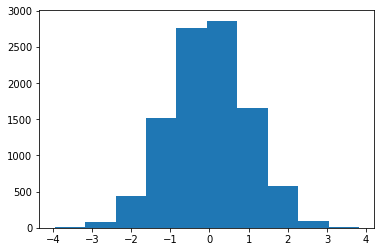

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

# 10000個のランダム変数でヒストグラム作成
plt.hist(np.random.randn(10000))

In [18]:
np.random.uniform(low=0, high=2*np.pi)

4.794744568848088

　これまでMatplotlibのいくつかの例を見てきました。 MATLABを使用したことがある場合、Matplotlibコードは見慣れたものだったかもしれません。

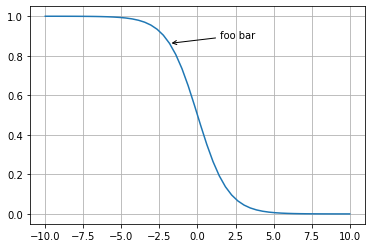

In [19]:
x = np.linspace(-10, 10)
y = 1 / (1 + np.exp(x))
plt.plot(x, y)
plt.annotate(
    'foo bar', (x[20], y[20]), (50, 5),
    textcoords='offset points',
    arrowprops={'arrowstyle': '->'})
plt.grid()

## ６．Astropy

　Astropyは天文学に欠かせないPythonパッケージです。これは、他の多くのPython天文学パッケージによって形成されていますが、多くのオリジナルコードも含まれています。主な機能は次のとおりです。
 
* `astropy.constants`, `astropy.units`: 物理定数、単位、および単位変換
* `astropy.time`: 日付と時刻の操作
* `astropy.coordinates`: 天文座標系の表現と変換
* `astropy.table`: 表とグリッドデータ
* `astropy.io.fits`: FITSファイルの操作
* `astropy.io.ascii`: 様々な形式のASCIIテーブルの操作
* `astropy.io.votable`: 仮想天文台のテーブル
* `astropy.wcs`: 世界座標系の変換
* `astropy.cosmology`: 宇宙論的計算
* `astropy.stats`: 天文統計
* `astropy.modeling`: Swiss army knifeのmulti-Dモデルフィッティング

　Astropyプロジェクトには、同様のデザインをしているが個別に運用されている次のような ["関連パッケージ"](http://www.astropy.org/affiliated/index.html)もあります。
 
 * [Photutils](https://photutils.readthedocs.io/): アパーチャー測光
 * [Astroquery](https://astroquery.readthedocs.io/): 天文データベースの質問

 P48の画像を開いて実験してみましょう。この演習では、Astropyパッケージのモジュールがいくつか必要です。

In [10]:
import astropy.coordinates
import astropy.units as u
import astropy.io.fits
import astropy.stats
import astropy.table
import astropy.wcs
import astropy.cosmology
import scipy.optimize
import scipy.odr

　P48の画像をダウンロードしてdata/directoryに配置しました。

In [11]:
fits = astropy.io.fits.open('data/PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits')
fits

　このFITSファイルのHDUを取得しましょう。

In [12]:
hdu = fits[0]

　次に、ヘッダーの内容を見てみましょう。

In [13]:
hdu.header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                 2048 / STANDARD FITS FORMAT                           
NAXIS2  =                 4096 / STANDARD FITS FORMAT                           
ORIGIN  = 'Palomar Transient Factory' / Origin of these image data              
CREATOR = 'Infrared Processing and Analysis Center' / Creator of this FITS file 
TELESCOP= 'P48     '           / Name of telescope                              
INSTRUME= 'PTF/MOSAIC'         / Instrument name                                
OBSERVER= 'KulkarniPTF'        / Observer name and project                      
CCDID   = '11      '           / CCD number (0..11)                             
DATE-OBS= '2013-07-02T04:17:23.555' / UTC shutter time YYYY-MM-DDTHH:MM:SS.SSS  
DATE    = '2013-07-01T21:35:

　次に、画像データをプロットします。シグマクリッピングを使用して画像に適切なスケールを選択しましょう。

In [14]:
mean, median, std = astropy.stats.sigma_clipped_stats(hdu.data)

Text(0, 0.5, 'pixel $y$')

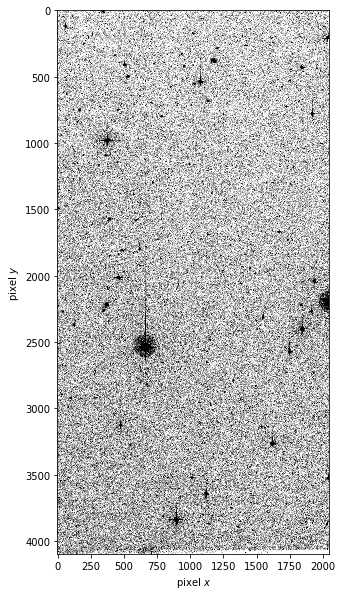

In [17]:
plt.figure(figsize=(20, 10))
plt.imshow(hdu.data, vmin=mean-std, vmax=mean+3*std, cmap='binary')
plt.xlabel('pixel $x$')
plt.ylabel('pixel $y$')

　$\mathrm{RA, Dec}=14^\mathrm{h}29^{m}14.781^{s}, +15^\circ46^\prime26.385^{\prime\prime}$の付近を
 見ると面白いでしょう。IPACからカタログファイルを開いて、この座標を見つけましょう。

In [18]:
catalog_filename = 'data/PTF_201307021787_c_p_scie_t041723_u016616794_f02_p003486_c11.ctlg.gz'
catalog_table = astropy.table.Table.read(catalog_filename)
catalog_table

<Table length=3677>
  NUMBER   FLAGS XWIN_IMAGE YWIN_IMAGE ...  FLUX_PETRO  FLUXERR_PETRO ZEROPOINT
                    pix        pix     ...      ct            ct               
  int32    int16  float64    float64   ...   float32       float32     float32 
---------- ----- ---------- ---------- ... ------------ ------------- ---------
         1    28   2043.074    214.094 ... 1.010962e+07      2991.671 27.846247
         2     4     65.380    121.919 ...      1643842      1118.459 27.824438
         3     0    983.166     38.558 ...     34078.66      806.3724 27.827711
         4    24    347.435     11.880 ...     97637.42      1273.242 27.829847
         5     0   1419.644     16.543 ...     208834.9      453.9077 27.834558
         6     0    514.564     10.706 ...     1151.076      148.5741 27.824036
         7    16    681.212      6.826 ...     31196.84       314.963  27.82548
         8    17   1702.202      3.995 ...     1736.771       275.431  27.84032
         9    16   1462.955      4.041 ...     74.95251      205.9214 27.834024
       ...   ...        ...        ... ...          ...           ...       ...
      3668     0    633.149   3001.570 ...       629.93      150.1085 27.823418
      3669     0   1349.198   2992.668 ...     4264.755       257.681 27.827106
      3670     0    480.257   3026.587 ...     3148.517       297.799 27.822645
      3671     0    438.992   3038.134 ...     5518.571      380.4832 27.822363
      3672     0   1200.923   2973.869 ...     679.0667      173.8118 27.827667
      3673     0   1900.714   2959.848 ...      456.535      227.0471 27.843845
      3674     0    871.156   2991.505 ...      82773.5      353.2516 27.826073
      3675     3   1023.866   3017.437 ...     4587.294      367.7406  27.82908
      3676     0   1179.159   3018.957 ...     1961.532      322.9964   27.8279
      3677     0   1662.327   3030.111 ...     1493.354      298.8986 27.834106

　次に、検索するターゲットを表す座標オブジェクトを作成しましょう。

In [19]:
target_coord = astropy.coordinates.SkyCoord(
    '14h29m14.781s +15d46m26.385s')
target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (217.3115875, 15.77399583)>

　　次に、この位置をソースカタログと照合します。

In [20]:
# カタログでの目標天体の座標
catalog_coords = astropy.coordinates.SkyCoord(
    ra=catalog_table['ALPHAWIN_J2000'],
    dec=catalog_table['DELTAWIN_J2000'])

# ソースカタログとのマッチング
index, separation, distance = target_coord.match_to_catalog_sky(catalog_coords)
index, separation

(array(3259), <Angle [4.20500043e-06] deg>)

　最も近い行は次のとおりです。

In [21]:
index = np.asscalar(index)
matching_row = catalog_table[index]

/home/fmori/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'pixel $y$')

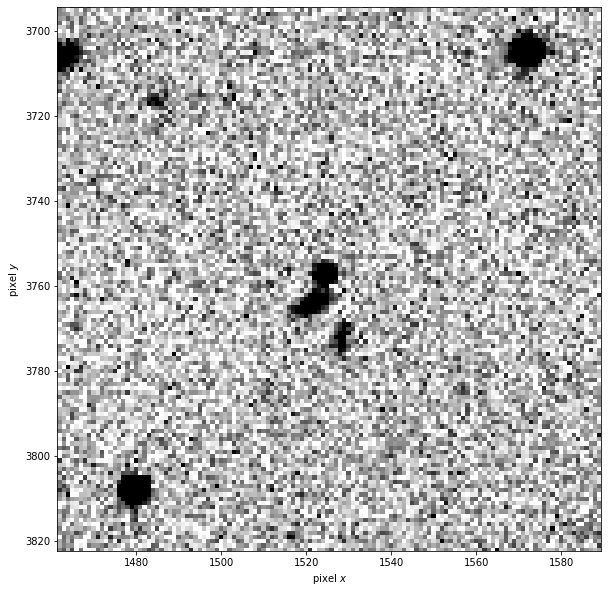

In [22]:
plt.figure(figsize=(10, 10))
plt.imshow(hdu.data, vmin=mean-std, vmax=mean+3*std, cmap='binary', interpolation='nearest')
plt.xlim(matching_row['XWIN_IMAGE'] - 64, matching_row['XWIN_IMAGE'] + 64)
plt.ylim(matching_row['YWIN_IMAGE'] - 64, matching_row['YWIN_IMAGE'] + 64)

# これらの画像は逆さまに見えています APLPyなどを使用して自動的に北を上に向けるようにしましょう。
plt.gca().invert_yaxis()

plt.xlabel('pixel $x$')
plt.ylabel('pixel $y$')

　Sextractor測光をキャリブレーションしましょう。[Astroquery](http://astroquery.readthedocs.org/)を使って、[IRSA](http://irsa.ipac.caltech.edu/)で[PTF:測光校正カタログ](http://irsa.ipac.caltech.edu/cgi-bin/Gator/nph-scan?projshort=Contributed_Data_Sets)を使用します。

In [23]:
from astroquery.irsa import Irsa

calib_table = Irsa.query_region(
    target_coord,
    catalog='ptfphotcalcat',
    radius=200*u.arcsec)
calib_table

<Table length=19>
    ra        dec         clon         clat     ...  flag    dist      angle   
   deg        deg                               ...         arcsec      deg    
 float64    float64      object       object    ... int64  float64    float64  
---------- ---------- ------------ ------------ ... ----- ---------- ----------
217.310789  15.772086 14h29m14.59s 15d46m19.51s ...     1   7.428213 201.936592
217.298347  15.759781 14h29m11.60s 15d45m35.21s ...     1  68.740981 221.872219
217.325504  15.788647 14h29m18.12s 15d47m19.13s ...     1  71.441115   42.43006
217.290852  15.770452 14h29m09.80s 15d46m13.63s ...     1  72.972506 259.922078
217.316083  15.752775 14h29m15.86s 15d45m09.99s ...     1  77.979509 168.484482
217.293844  15.788367 14h29m10.52s 15d47m18.12s ...     1  80.340374 310.076374
217.341936  15.781173 14h29m22.06s 15d46m52.22s ...     1 108.254667  76.195635
217.298534  15.802011 14h29m11.65s 15d48m07.24s ...     1 110.518047 335.844641
217.280035  15.768564 14h29m07.21s 15d46m06.83s ...     1  111.05929 259.855291
217.279193  15.755032 14h29m07.01s 15d45m18.12s ...     1 131.381738 238.689357
217.293286  15.806913 14h29m10.39s 15d48m24.89s ...     1 134.386258 331.849195
217.270767  15.767673 14h29m04.98s 15d46m03.62s ...     1 143.252977   260.8567
217.344082  15.749366 14h29m22.58s 15d44m57.72s ...     1 143.308281  128.22579
217.268123  15.768260 14h29m04.35s 15d46m05.74s ...     1 152.001619 262.192586
217.278521  15.746038 14h29m06.85s 15d44m45.74s ...     1 152.512542 228.702158
217.274578  15.745016 14h29m05.90s 15d44m42.06s ...     1 165.322266 230.870344
217.295918  15.729915 14h29m11.02s 15d43m47.69s ...     1 167.738282 198.890243
217.349143  15.806507 14h29m23.79s 15d48m23.43s ...     1 174.980335  48.021103
217.322520  15.826148 14h29m17.40s 15d49m34.13s ...     1 191.512624   11.40079

 これらがターゲットに関連している場所を見てみましょう。表のRA、Decをピクセル座標に変換する必要があります。そこで登場するのが、世界座標系（WCS）を用いた変換です。

In [24]:
wcs = astropy.wcs.WCS(hdu.header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


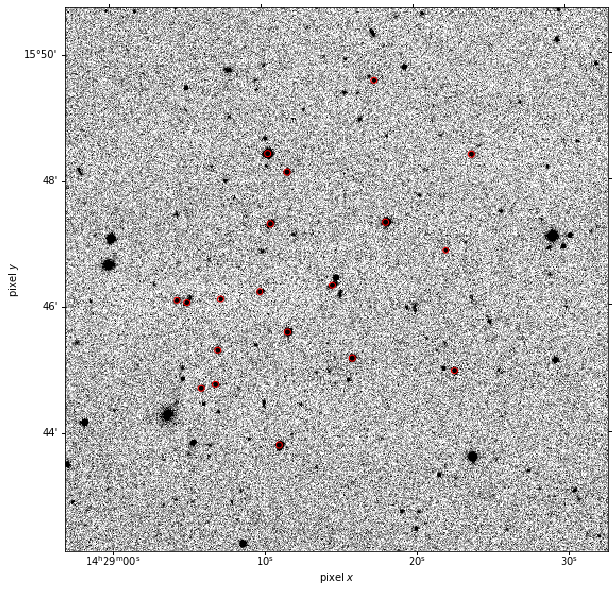

In [25]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=wcs)
ax.imshow(hdu.data, vmin=mean-std, vmax=mean+3*std, cmap='binary')
ax.set_xlim(matching_row['XWIN_IMAGE'] - 256, matching_row['XWIN_IMAGE'] + 256)
ax.set_ylim(matching_row['YWIN_IMAGE'] - 256, matching_row['YWIN_IMAGE'] + 256)

# Note: last argument is 'origin': FITS standard uses 1-based Fortran-like
# indexing, but Python uses 0-based C-like indexing. In this case, we are
# aligning these locations to a Python array, so we want 0-based indexing.

x, y = wcs.all_world2pix(calib_table['ra'], calib_table['dec'], 0)
ax.scatter(x, y, facecolor='none', edgecolor='red')

# I happen to know that these images are upside down; use APLPy or the like to
# automatically orient North upward
ax.invert_yaxis()

ax.set_xlabel('pixel $x$')
ax.set_ylabel('pixel $y$')

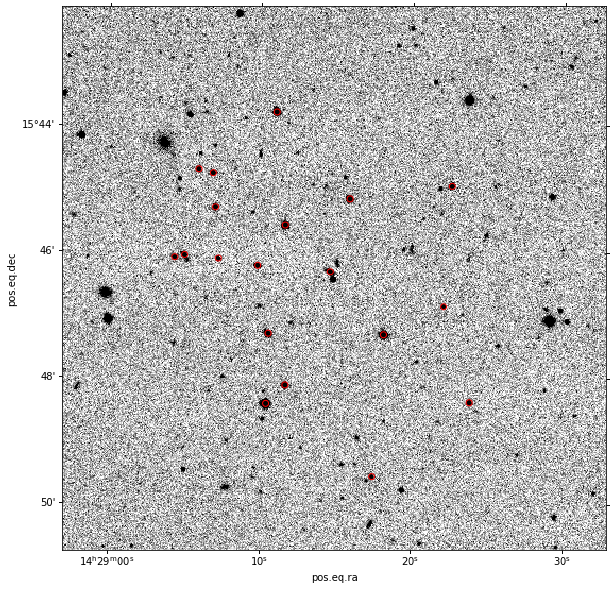

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=wcs)
ax.set_xlim(matching_row['XWIN_IMAGE'] - 256, matching_row['XWIN_IMAGE'] + 256)
ax.set_ylim(matching_row['YWIN_IMAGE'] - 256, matching_row['YWIN_IMAGE'] + 256)
ax.imshow(
    hdu.data, vmin=mean-std, vmax=mean+3*std,
    cmap='binary')
x, y = wcs.all_world2pix(calib_table['ra'], calib_table['dec'], 0)
ax.scatter(x, y, facecolor='none', edgecolor='red')

　次に、キャリブレーションソースをSExtractorカタログのソースと照合します。

In [27]:
calib_coords = astropy.coordinates.SkyCoord(calib_table['ra'], calib_table['dec'])
indexes, _, _ = calib_coords.match_to_catalog_sky(catalog_coords)

In [28]:
matches = astropy.table.Table()
matches.add_column(calib_table['rptf'])
matches.add_column(calib_table['rerr'])
matches.add_column(catalog_table[indexes]['MAG_AUTO'])
matches.add_column(catalog_table[indexes]['MAGERR_AUTO'])
matches

<Table length=19>
  rptf    rerr  MAG_AUTO MAGERR_AUTO
  mag     mag     mag        mag    
float64 float64 float32    float32  
------- ------- -------- -----------
 18.051   0.032  -9.7602      0.0299
 15.742   0.011 -12.0844      0.0043
 15.209   0.007 -12.6132      0.0032
 17.942   0.023  -9.8900      0.0231
 16.188    0.01 -11.6361      0.0057
 18.102   0.044  -9.8108      0.0357
 18.722   0.031  -9.1197      0.0361
 16.728   0.016 -11.0744      0.0082
 18.581   0.028  -9.1939      0.0344
   18.2   0.023  -9.5808      0.0286
 14.598   0.008 -13.2128      0.0023
 17.762   0.029  -9.9765      0.0255
 18.272    0.03  -9.5726      0.0308
 18.298   0.027  -9.4639      0.0305
 17.751   0.021 -10.0750      0.0178
  18.21   0.027  -9.6532      0.0249
 15.487   0.011 -12.3439      0.0037
  17.52   0.019 -10.2847      0.0149
 18.759   0.037  -9.0462      0.0389

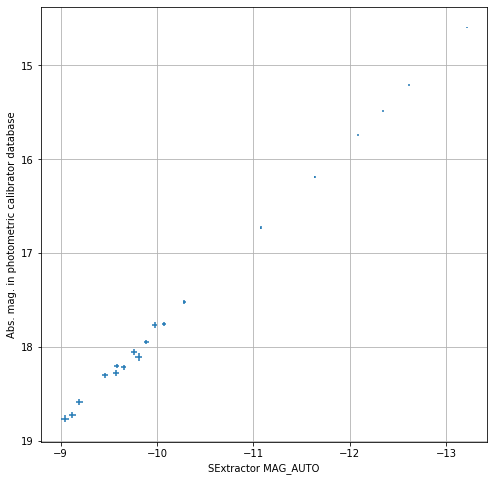

In [29]:
plt.figure(figsize=(8, 8))
plt.errorbar(matches['MAG_AUTO'], matches['rptf'],
    xerr=matches['MAGERR_AUTO'], yerr=matches['rerr'],
    linestyle='none')
plt.xlabel('SExtractor MAG_AUTO')
plt.ylabel('Abs. mag. in photometric calibrator database')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid()

　次に、線形近似を行います。Scipyの直交データ回帰モジュール`scipy.odr`は、独立変数と従属変数の両方にエラーがある関数を近似するのに最適です。

In [30]:
data = scipy.odr.RealData(
    x=matches['MAG_AUTO'], sx=matches['MAGERR_AUTO'],
    y=matches['rptf'], sy=matches['rerr'])
odr = scipy.odr.ODR(data, scipy.odr.models.unilinear)
odr.run()

odr.output.pprint()

Beta: [ 0.99876513 27.80407075]
Beta Std Error: [0.00359417 0.04356201]
Beta Covariance: [[1.26586162e-05 1.52798220e-04]
 [1.52798220e-04 1.85953408e-03]]
Residual Variance: 1.020496782937359
Inverse Condition #: 0.0069297800872482815
Reason(s) for Halting:
  Sum of squares convergence


　フィッティングの様子を見てみましょう。

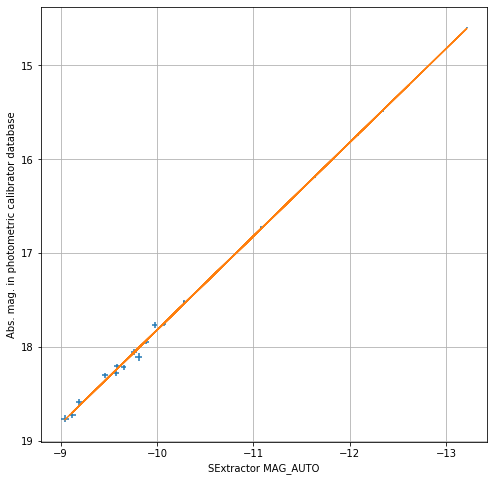

In [31]:
plt.figure(figsize=(8, 8))
plt.errorbar(matches['MAG_AUTO'], matches['rptf'],
    xerr=matches['MAGERR_AUTO'], yerr=matches['rerr'],
    linestyle='none')
plt.plot(matches['MAG_AUTO'], odr.model.fcn(odr.output.beta, matches['MAG_AUTO']))
plt.xlabel('SExtractor MAG_AUTO')
plt.ylabel('Abs. mag. in photometric calibrator database')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid()

　最後に、ターゲットの大きさを評価できます。

In [32]:
mag_R = odr.model.fcn(odr.output.beta, matching_row['MAG_AUTO'])
mag_R

17.338610982154563

　次に、近似とSExtractorの相対的な大きさの測定から誤差を伝播します。

In [33]:
# Jacobian w.r.t. fit parameters
fjacb = odr.model.fjacb(odr.output.beta, np.atleast_1d(matching_row['MAG_AUTO']))
# Jacobian w.r.t. data
fjacd = odr.model.fjacd(odr.output.beta, matching_row['MAG_AUTO'])

# Uncertainty in magnitude due to fit
var = np.dot(fjacb.T, np.dot(odr.output.cov_beta, fjacb))

# Add contribution due to uncertainty in relative photometry
var += np.dot(fjacd.T, np.dot(matching_row['MAGERR_AUTO']**2, fjacd))

# Take square root -> error bar
emag_R = np.asscalar(np.sqrt(var))
emag_R

/home/fmori/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  del sys.path[0]


0.014766868900759192

　したがって、色補正の場合、この光源の大きさは$17.34 \pm 0.015$です。

　これは、$z=0.145$の赤方偏移でのGRBの残光です。その光度距離はいくらでしょうか。

In [36]:
z = 0.145
cosmo = astropy.cosmology.default_cosmology.get()
DL = cosmo.luminosity_distance(z)
DL

<Quantity 709.47944076 Mpc>

　これを距離係数に変換して、ソースの絶対等級を見つけましょう。

In [37]:
distance_modulus = 5 * np.log10(DL / (10*u.pc))
distance_modulus

<Quantity 39.25469908>

　別のショートカットでは、

In [45]:
cosmo.distmod(z)

<Quantity 39.25469908 mag>

　したがって、絶対等級は

In [38]:
mag_R - distance_modulus

<Quantity -21.91608809>